In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform

rcParams = {'font.size': 24 , 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}


In [2]:
df = pd.read_csv('/Users/harihara/Research-Activities/Data/Hot-Spring/contig_contaiment_by_sample_summary_map.txt', sep = "\t")
FM = df.filter(regex = "Group_*").values
Dist_Mat = squareform(pdist(FM, metric = "hamming"))

/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys
/Users/harihara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


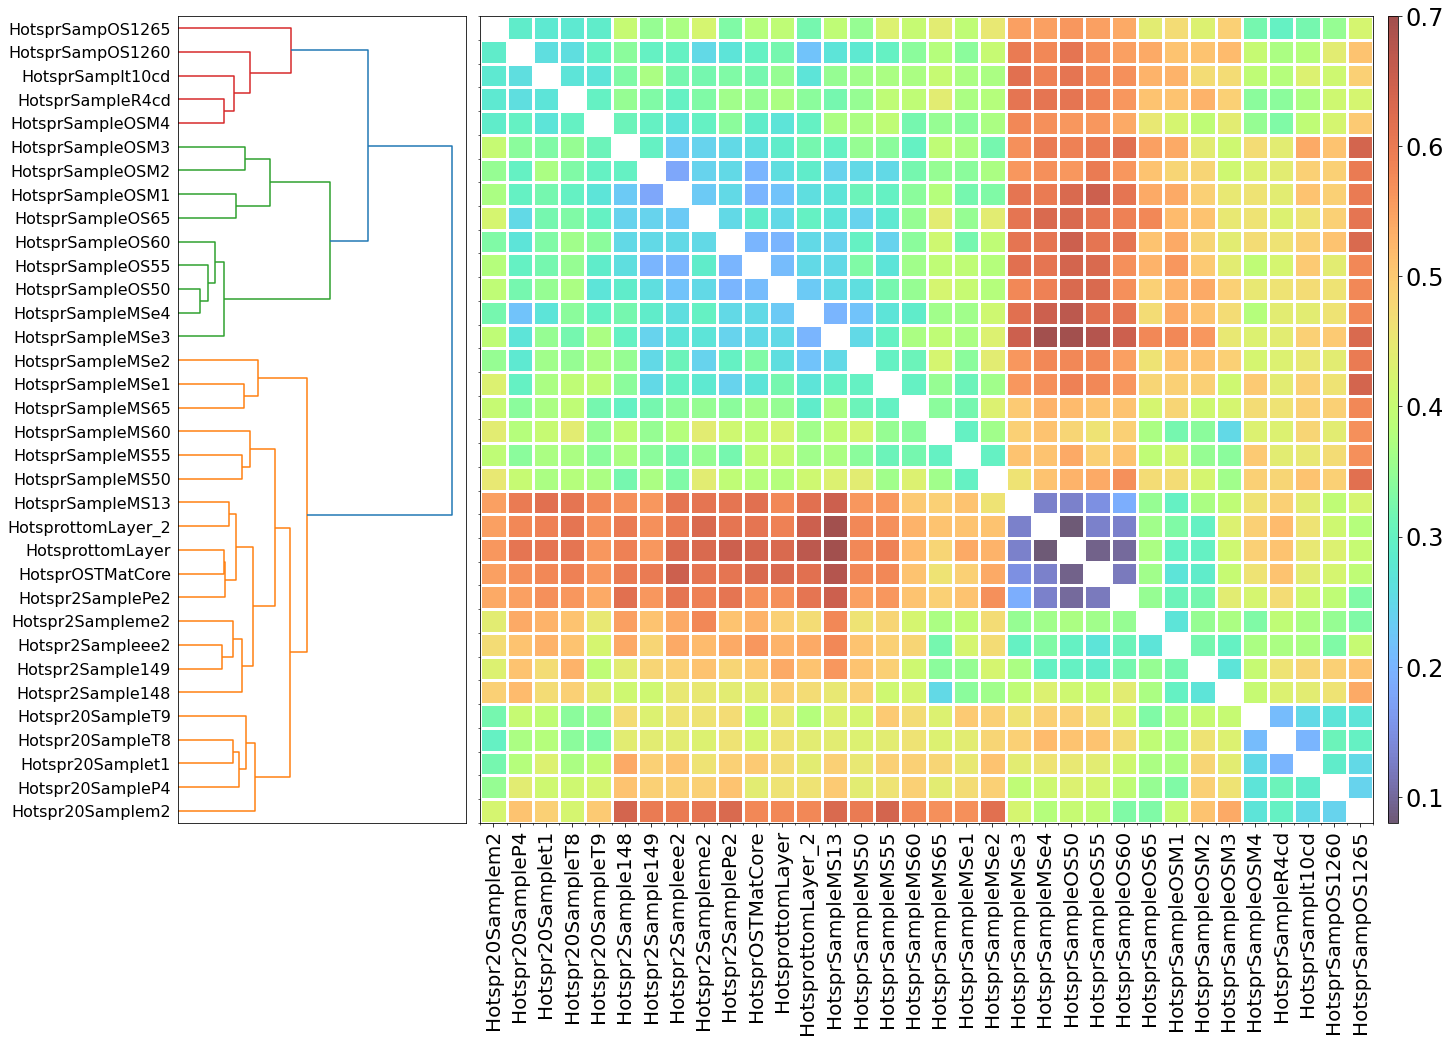

In [65]:
plt.rcParams.update(rcParams)

MAT = Dist_Mat

fig = plt.figure(figsize=(20,16))
axdendro = fig.add_axes([0.12,0.25,0.2,0.7])
Y = sch.linkage(MAT, method='complete',optimal_ordering=True)
Z = sch.dendrogram(Y, orientation='right', color_threshold = 0.6*max(Y[:,2]))
index = Z['leaves']
ticks = df.SampleID.tolist()
axdendro.set_xticks([])
axdendro.set_yticklabels(ticks, size = 16)

axmatrix = fig.add_axes([0.33,0.25,0.62,0.7])

MAT = MAT[index,:]
MAT = MAT[:,index]
MAT = np.round(MAT, 2)
MAT[MAT == 0] = np.inf
im = axmatrix.imshow(MAT, aspect='auto', origin='upper', interpolation = 'none', cmap = 'turbo', alpha = 0.7)
axmatrix.set_xticks(list(range(0, len(ticks))))
axmatrix.set_xticklabels(ticks, rotation = 90, size = 20)
axmatrix.xaxis.set_ticks_position('bottom')
ng = len(ticks)
axmatrix.set_xticks(np.arange(-.5, 34, 1), minor=True)
axmatrix.set_yticks(np.arange(-.5, 34, 1), minor=True)

# Gridlines based on minor ticks
axmatrix.grid(which='minor', color='w', linestyle='-', linewidth=3)

axmatrix.set_yticks([])

axcolor = fig.add_axes([0.96,0.25,0.0075,0.7])
plt.colorbar(im, cax=axcolor)

fig.tight_layout()
fig.savefig('/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Synechococcus-Paper/Cluster_Novel_Contigs.pdf')